# Chapter 3 - Autoregressive (AR) Models

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [4]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

### Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different 
parameter, ϕ, using the arima_process module in statsmodels. In this exercise, 
you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, 
but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require 
some explanation. First, these routines were made very generally to handle both 
AR and MA models. We will cover MA models next, so for now, just ignore the MA 
part. Second, when inputting the coefficients, you must include the zero-lag 
coefficient of 1, and the sign of the other coefficients is opposite what we 
have been using (to be consistent with the time series literature in signal 
processing). For example, for an AR(1) process with ϕ=0.9, the array representing 
the AR parameters would be

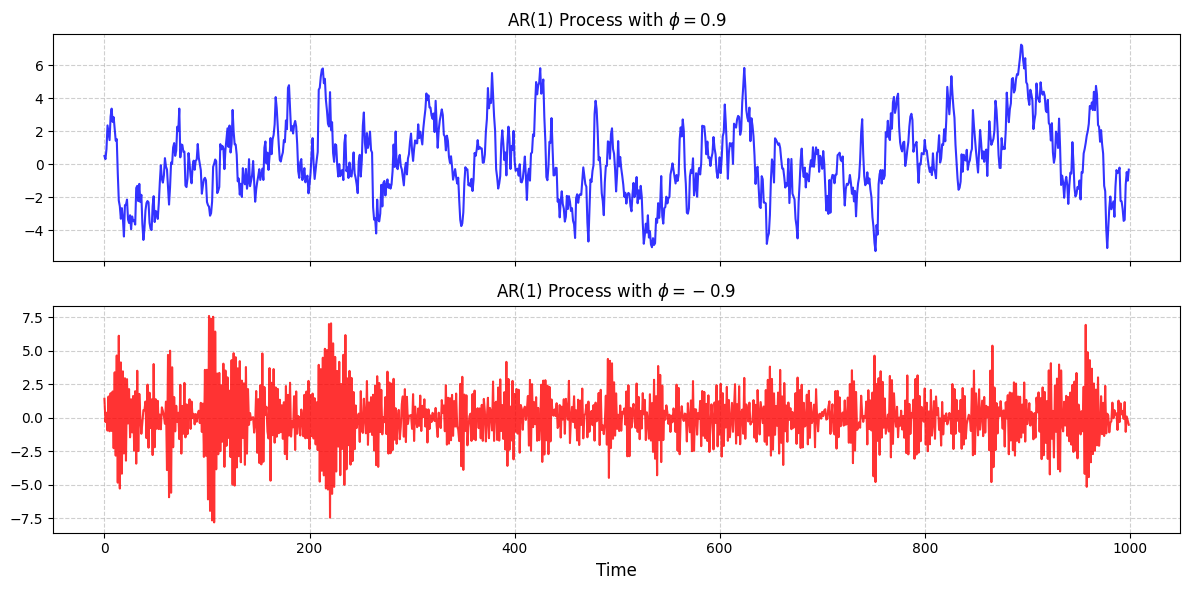

In [6]:
# Set random seed
np.random.seed(42)

# Simulate and plot AR(1) process with AR coefficient = 0.9
ar1 = np.array([1, -0.9])                                    # AR(1) coefficient with strong positive correlation
ma1 = np.array([1])                                          # No MA component (pure AR process)
AR_object1 = ArmaProcess(ar1, ma1)                           # Create ARMA process object
simulated_data_1 = AR_object1.generate_sample(nsample=1000)  # Simulate data

# Simulate and plot AR(1) process with AR coefficient = -0.9
ar2 = np.array([1, 0.9])                                     # AR(1) coefficient with strong negative correlation
ma2 = np.array([1])                                          # No MA component (pure AR process)
AR_object2 = ArmaProcess(ar2, ma2)                           # Create ARMA process object
simulated_data_2 = AR_object2.generate_sample(nsample=1000)  # Simulate data


# Create a figure with 2 vertically stacked subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

axes[0].plot(simulated_data_1, color='b', alpha=0.8) 
axes[0].set_title(r'AR(1) Process with $\phi = 0.9$', fontsize=12)  
axes[0].grid(True, linestyle='--', alpha=0.6)  

axes[1].plot(simulated_data_2, color='r', alpha=0.8)  
axes[1].set_title(r'AR(1) Process with $\phi = -0.9$', fontsize=12) 
axes[1].grid(True, linestyle='--', alpha=0.6)  
axes[1].set_xlabel('Time', fontsize=12)  

plt.tight_layout()
plt.show()

### Compare the ACF for Several AR Time Series

    The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag  autocorrelation will be 0.9, the second-lag will be (0.9)2=0.81, the third-lag  will be (0.9)3=0.729, etc. 

    A smaller AR parameter will have a steeper decay,  and for a negative AR parameter, say -0.9, the decay will flip signs, so the  first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)2=0.81,  the third-lag will be (−0.9)3=−0.729, etc.

    The object simulated_data_1 is the simulated time series with an AR parameter  of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3  is for an AR parameter of 0.3.

In [9]:
# Set random seed
np.random.seed(42)

# Simulate AR(1) processes with different parameters
ar1 = np.array([1, -0.9])  
ar2 = np.array([1, 0.9])  
ar3 = np.array([1, -0.3])  

ma = np.array([1])  

# Generate sample data
simulated_data_1 = ArmaProcess(ar1, ma).generate_sample(nsample=1000)
simulated_data_2 = ArmaProcess(ar2, ma).generate_sample(nsample=1000)
simulated_data_3 = ArmaProcess(ar3, ma).generate_sample(nsample=1000)

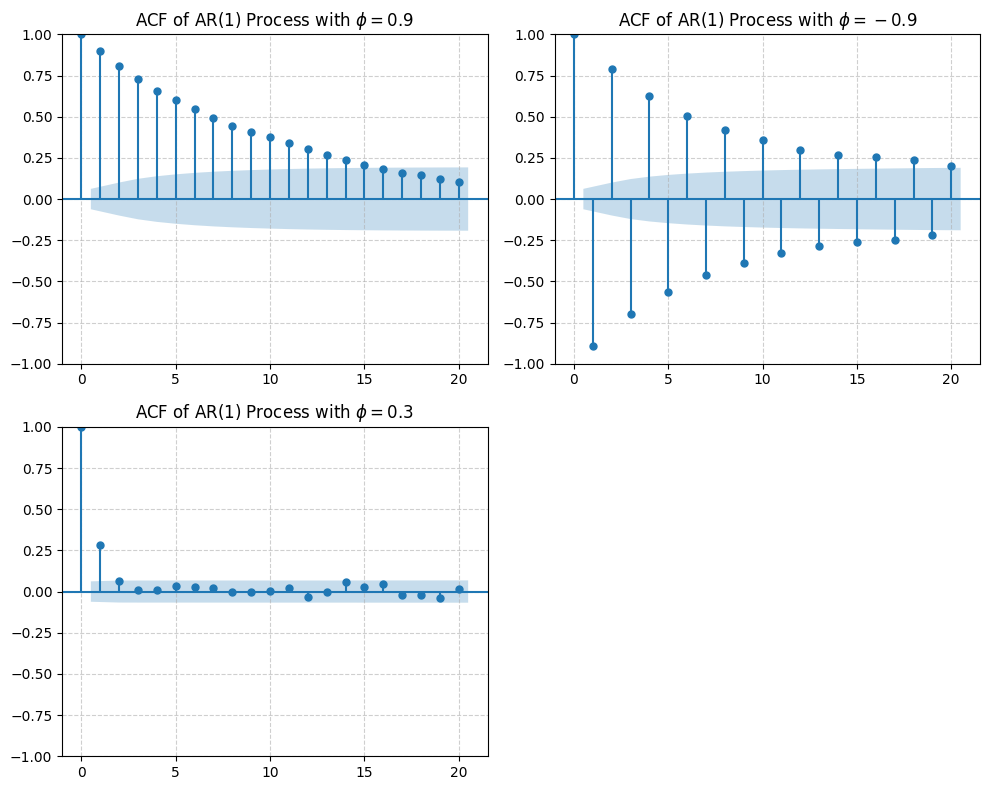

In [10]:
# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot ACF for AR(1) with different coefficients
plot_acf(simulated_data_1, ax=axes[0,0], alpha=0.05, lags=20)
axes[0,0].set_title("ACF of AR(1) Process with $\phi = 0.9$", fontsize=12)
axes[0,0].grid(True, linestyle="--", alpha=0.6)

plot_acf(simulated_data_2, ax=axes[0,1], alpha=0.05, lags=20)
axes[0,1].set_title("ACF of AR(1) Process with $\phi = -0.9$", fontsize=12)
axes[0,1].grid(True, linestyle="--", alpha=0.6)

plot_acf(simulated_data_3, ax=axes[1,0], alpha=0.05, lags=20)
axes[1,0].set_title("ACF of AR(1) Process with $\phi = 0.3$", fontsize=12)
axes[1,0].grid(True, linestyle="--", alpha=0.6)

# Remove the empty subplot (bottom-right)
fig.delaxes(axes[1,1])  

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### Estimating an AR Model
You will estimate the AR(1) parameter, ϕ, of one of the simulated series that 
you generated in the earlier exercise. Since the parameters are known for a 
simulated series, it is a good way to understand the estimation routines before 
applying it to real data.

For simulated_data_1 with a true ϕ of 0.9, you will print out the estimate of ϕ. 
In addition, you will also print out the entire output that is produced when 
you fit a time series, so you can get an idea of what other tests and summary 
statistics are available in statsmodels.

In [12]:
# Fit an AR(1) model (equivalent to ARMA(1,0))
mod = ARIMA(simulated_data_1, order=(1,0,0))  # AR(1) process
res = mod.fit()

# Print summary of the fitted model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1398.152
Date:                Thu, 13 Mar 2025   AIC                           2802.303
Time:                        09:03:34   BIC                           2817.027
Sample:                             0   HQIC                          2807.899
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1955      0.307      0.638      0.524      -0.406       0.797
ar.L1          0.8988      0.014     63.843      0.000       0.871       0.926
sigma2         0.9577      0.042     22.660      0.0

In [13]:
# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

When the true phi=0.9, the estimate of phi (and the constant) are:
[0.1955393  0.89877014 0.95768407]


### Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last 
exercise, you can also do forecasting, both in-sample and out-of-sample using 
statsmodels. The in-sample is a forecast of the next data point using the data 
up to that point, and the out-of-sample forecasts any number of data points in 
the future. 

For the simulated series simulated_data_1 with ϕ=0.9, you will plot in-sample 
and out-of-sample forecasts.

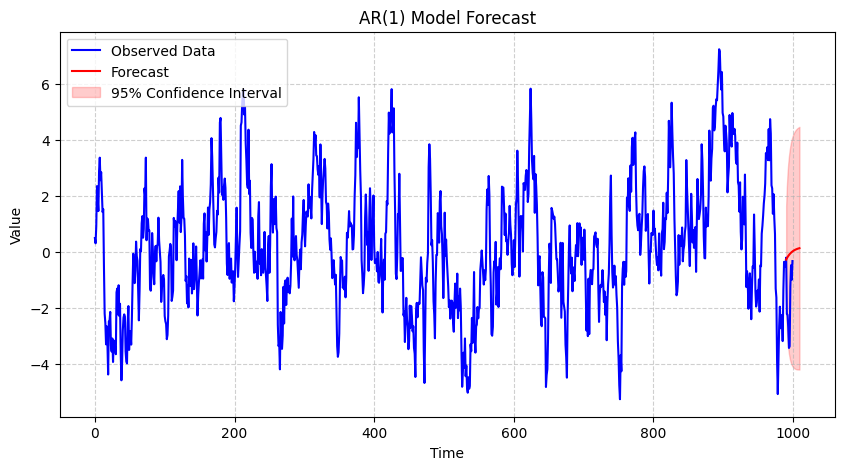

In [15]:
# Generate forecast for the next 20 steps
forecast = res.get_forecast(steps=20)
forecast_index = np.arange(990, 1010)  # Define index for predictions

# Extract predicted mean and confidence intervals
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()  # No need to use .values

# Plot the original series
plt.figure(figsize=(10, 5))
plt.plot(simulated_data_1, label="Observed Data", color='blue')

# Plot forecast
plt.plot(forecast_index, predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], 
                 color='red', alpha=0.2, label="95% Confidence Interval")

# Formatting
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("AR(1) Model Forecast")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

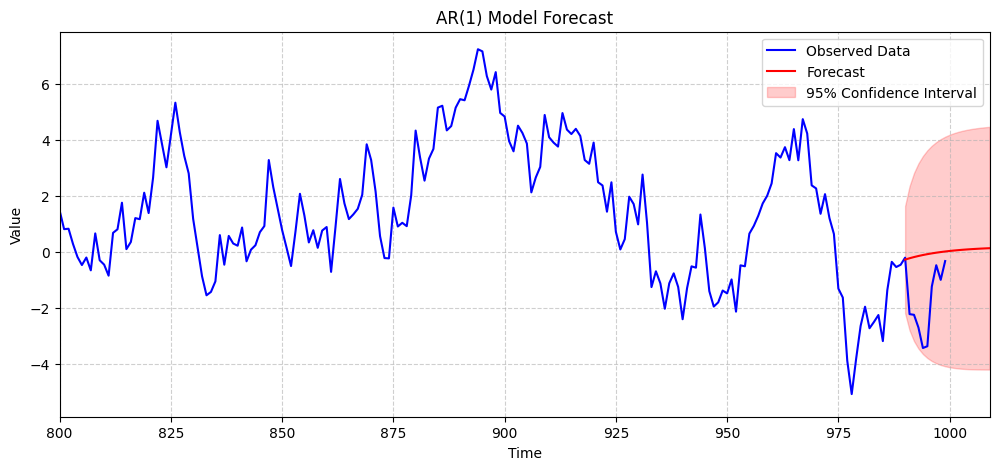

In [16]:
# Plot the original series
plt.figure(figsize=(12, 5))
plt.plot(simulated_data_1, label="Observed Data", color='blue')

# Plot forecast
plt.plot(forecast_index, predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], 
                 color='red', alpha=0.2, label="95% Confidence Interval")

# Formatting
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("AR(1) Model Forecast")
plt.legend()
plt.xlim(800,1009)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last exercise 
and apply it to real data rather than simulated data. You will revisit a dataset 
from the first chapter: the annual data of 10-year interest rates going back 
56 years, which is in a Series called interest_rate_data. Being able to forecast 
interest rates is of enormous importance, not only for bond investors but also 
for individuals like new homeowners who must decide between fixed and floating 
rate mortgages.

You saw in the first chapter that there is some mean reversion in interest 
rates over long horizons. In other words, when interest rates are high, they 
tend to drop and when they are low, they tend to rise over time. Currently they 
are below long-term rates, so they are expected to rise, but an AR model attempts 
to quantify how much they are expected to rise.

In [18]:
# Load Dataset
interest_rate_data = pd.read_excel('data/interest_rate_data.xlsx')
interest_rate_data = pd.DataFrame(interest_rate_data)

# Set date as index
interest_rate_data = interest_rate_data.set_index('DATE')

interest_rate_data.head()

,Unnamed: 1
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


In [19]:
interest_rate_data.tail()

,Unnamed: 1
DATE,
2013-12-31,3.04
2014-12-31,2.17
2015-12-31,2.27
2016-12-31,2.45
2017-12-31,2.16


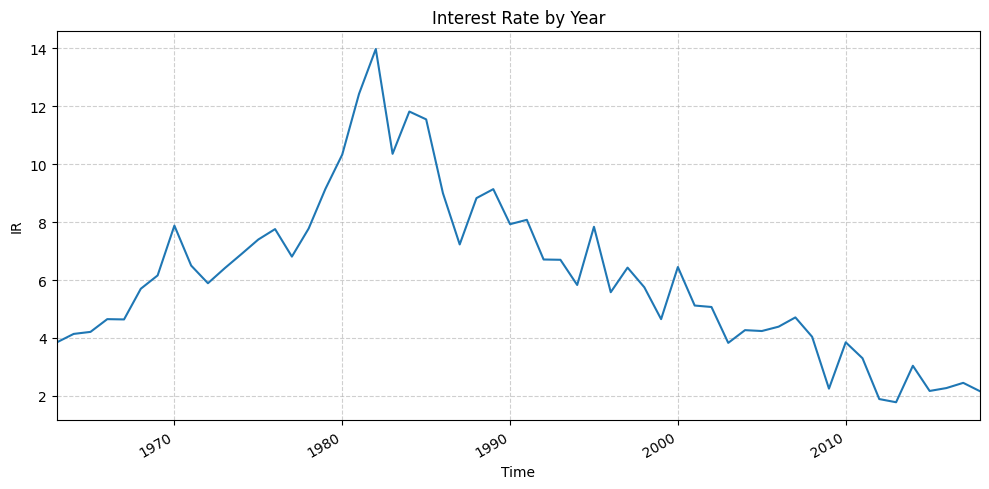

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(interest_rate_data)
ax.set_xlabel('Time')
ax.set_ylabel('IR')
ax.set_title('Interest Rate by Year')
ax.set_xlim(pd.to_datetime('1962-12-31'), pd.to_datetime('2017-12-31'))
ax.grid(True, linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()

In [21]:
len(interest_rate_data)

56

In [22]:
# Define and fit an AR(1) model using ARIMA (since ARMA is deprecated)
mod = sm.tsa.ARIMA(interest_rate_data, order=(1,0,0))  # AR(1) model
res = mod.fit()                                        # Fit the model

# Generate forecast for the next 20 periods
forecast = res.get_forecast(steps=20)  
forecast_index = np.arange(56, 56 + 20)  # Define index for predictions

# Extract predicted mean and confidence intervals
predicted_mean = forecast.predicted_mean  # Forecasted values
conf_int = forecast.conf_int()            # 95% Confidence interval

In [23]:
predicted_mean

2018-12-31    2.445184
2019-12-31    2.704514
2020-12-31    2.940334
2021-12-31    3.154775
2022-12-31    3.349776
2023-12-31    3.527098
2024-12-31    3.688345
2025-12-31    3.834973
2026-12-31    3.968309
2027-12-31    4.089556
2028-12-31    4.199812
2029-12-31    4.300072
2030-12-31    4.391243
2031-12-31    4.474149
2032-12-31    4.549538
2033-12-31    4.618093
2034-12-31    4.680433
2035-12-31    4.737122
2036-12-31    4.788671
2037-12-31    4.835547
Freq: YE-DEC, Name: predicted_mean, dtype: float64

In [24]:
conf_int

,lower Unnamed: 1,upper Unnamed: 1
2018-12-31,0.127093,4.763276
2019-12-31,-0.428688,5.837717
2020-12-31,-0.732707,6.613375
2021-12-31,-0.910874,7.220424
2022-12-31,-1.013923,7.713474
2023-12-31,-1.068481,8.122677
2024-12-31,-1.090486,8.467175
2025-12-31,-1.090242,8.760188
2026-12-31,-1.074744,9.011361
2027-12-31,-1.048895,9.228008


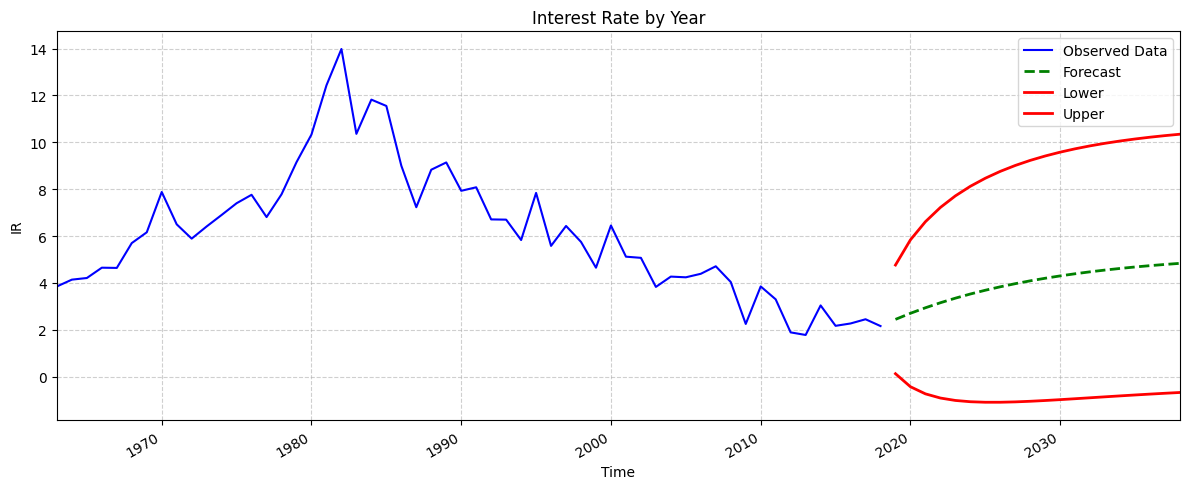

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(interest_rate_data, label="Observed Data", color='blue', linestyle='-')
ax.plot(predicted_mean, label="Forecast", color='green', linestyle='--', linewidth=2)
ax.plot(conf_int['lower Unnamed: 1'], label="Lower", color='red', linestyle='-', linewidth=2)
ax.plot(conf_int['upper Unnamed: 1'], label="Upper", color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('IR')
ax.set_title('Interest Rate by Year')
ax.set_xlim(pd.to_datetime('1962-12-31'), pd.to_datetime('2037-12-31'))
plt.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()

### Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly 
mean reverting and a time series that does not mean revert at all, like a random 
walk. You will compare the ACF for the slightly mean-reverting interest rate 
series of the last exercise with a simulated random walk with the same number 
of observations.

You should notice when plotting the autocorrelation of these two series 
side-by-side that they look very similar.

In [27]:
interest_rate_data.head()

,Unnamed: 1
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


In [28]:
simulated_data = ([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
                   6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
                   5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
                   5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
                   5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
                   3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
                   4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
                   3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
                   3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
                   2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
                   3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
                   3.37204482])

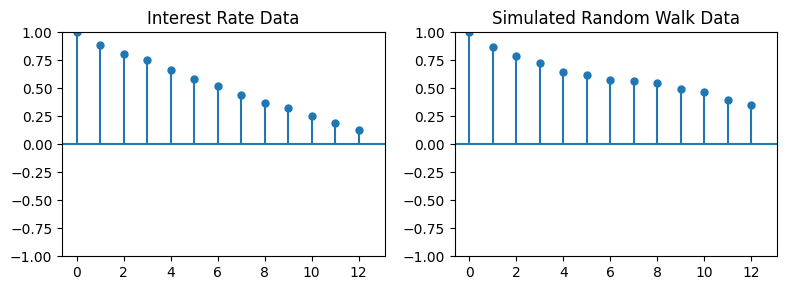

In [29]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))  

# Interest Rate Data
plot_acf(interest_rate_data, ax=axes[0], alpha=1, lags=12)
axes[0].set_title("Interest Rate Data", fontsize=12)

# Simulated Random Walk Data
plot_acf(simulated_data, ax=axes[1], alpha=1, lags=12)
axes[1].set_title("Simulated Random Walk Data", fontsize=12)

plt.tight_layout()
plt.show()

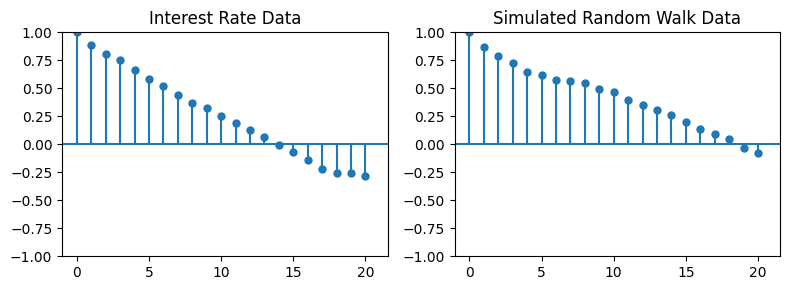

In [30]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))  

# Interest Rate Data
plot_acf(interest_rate_data, ax=axes[0], alpha=1, lags=20)
axes[0].set_title("Interest Rate Data", fontsize=12)

# Simulated Random Walk Data
plot_acf(simulated_data, ax=axes[1], alpha=1, lags=20)
axes[1].set_title("Simulated Random Walk Data", fontsize=12)

plt.tight_layout()
plt.show()

### Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the Partial 
Autocorrelation Function (PACF). In this exercise, you will simulate two time 
series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will 
notice that for an AR(1), the PACF should have a significant lag-1 value, and 
roughly zeros after that. And for an AR(2), the sample PACF should have significant 
lag-1 and lag-2 values, and zeros after that.

#### Simulating an AR(1) Process with $ \phi = 0.6 $

The **Autoregressive (AR) process** of order 1, denoted as **AR(1)**, is defined by the equation:

$$
X_t = 0.6 X_{t-1} + \varepsilon_t
$$

where:

- $ X_t $ represents the value of the time series at time $ t $.
- $ 0.6 $ is the autoregressive coefficient, indicating that each value depends on 60% of the previous value.
- $ \varepsilon_t \sim WN(0, \sigma^2) $ is a white noise process with mean 0 and variance $ \sigma^2 $.

This means that each observation is influenced by the past value with a weight of **0.6** plus a random shock.

In [34]:
# Simulate an AR(1) process with phi = +0.6
ma = np.array([1])                                         # Define the MA component (none in this case)
ar = np.array([1, -0.6])                                   # Define the AR(1) coefficients (phi = +0.6)
AR_object = ArmaProcess(ar, ma)                            # Create an ARMA process with the defined coefficients
simulated_data_1 = AR_object.generate_sample(nsample=5000) # Generate 5000 samples from the AR(1) process

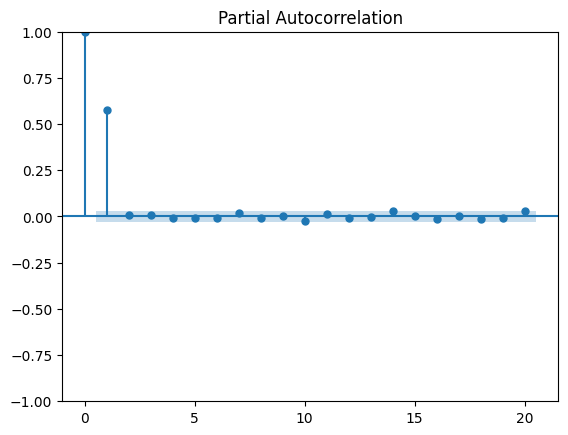

In [35]:
# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

#### Simulating an AR(2) Process with $ \phi_1 = 0.6 $ and $ \phi_2 = 0.3 $

The **Autoregressive (AR) process** of order 2, denoted as **AR(2)**, is defined by the equation:

$$
X_t = 0.6 X_{t-1} + 0.3 X_{t-2} + \varepsilon_t
$$

where:

- $ X_t $ represents the value of the time series at time $ t $.
- $ 0.6 $ is the first autoregressive coefficient ($ \phi_1 $), meaning each value depends on **60%** of the previous value $ X_{t-1} $.
- $ 0.3 $ is the second autoregressive coefficient ($ \phi_2 $), meaning each value also depends on **30%** of the value two time steps earlier $ X_{t-2} $.
- $ \varepsilon_t \sim WN(0, \sigma^2) $ is a white noise process with mean 0 and variance $ \sigma^2 $.

This equation shows that each observation is influenced by both **the previous value** and **the value two steps back**, plus a random noise term.


In [37]:
# Simulate an AR(2) process with phi1 = +0.6 and phi2 = +0.3
ma = np.array([1])                                         # Define the MA component (none in this case)
ar = np.array([1, -0.6, -0.3])                             # Define the AR(2) coefficients (phi1 = +0.6, phi2 = +0.3)
AR_object = ArmaProcess(ar, ma)                            # Create an ARMA process with the defined AR and MA coefficients
simulated_data_2 = AR_object.generate_sample(nsample=5000) # Generate 5000 samples from the AR(2) process

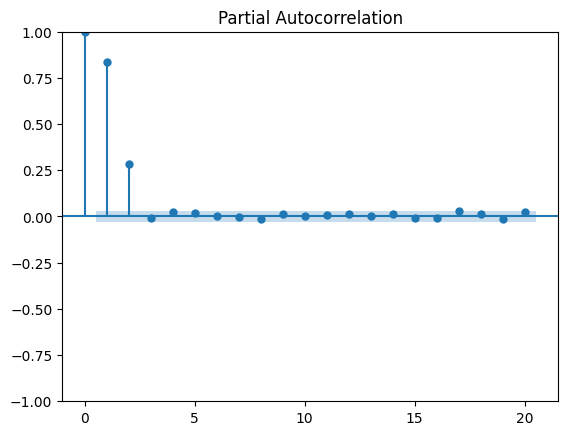

In [38]:
# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike 
Information Criterion (AIC) and the Bayesian Information Criterion (BIC). 
These measures compute the goodness of fit with the estimated parameters, but 
apply a penalty function on the number of parameters in the model. You will take 
the AR(2) simulated data from the last exercise, saved as simulated_data_2, and 
compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

In [40]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)

for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p, 0, 0))  # AR(p) model
    res = mod.fit()
    
    # Save BIC for AR(p)    
    BIC[p] = res.bic

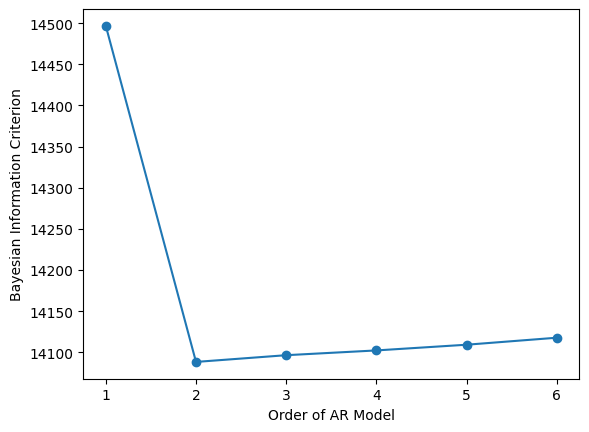

In [41]:
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()